# M.Karthik Sai Phanindra-221710405015

# PROBLEM STATEMENT:
#### To Predict the Quality of wine based on different physicochemical data ,using various Machine Learning Algorithms like Decision Tree classifier , Random Forest Classifier.


### Importing The Libraries 

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

### Version of the libraries 

In [2]:
print("pandas:",pd.__version__)
print("numpy",np.__version__)
print("matplotlib:",matplotlib.__version__)
print("seaborn:",sns.__version__)
print("sklearn:",sklearn.__version__)

pandas: 1.0.1
numpy 1.18.1
matplotlib: 3.1.3
seaborn: 0.10.0
sklearn: 0.23.1


### Reading The Data Set

In [3]:
df= pd.read_csv("wine.csv",sep=',')
df

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,white
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,white
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,white
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,white


In [4]:
df.head(10)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,red
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5,red
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7,red
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7,red
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5,red


### Checking for the missing values 

In [5]:
# Checking for the missing values 
df.isnull().sum()

fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
color                   0
dtype: int64

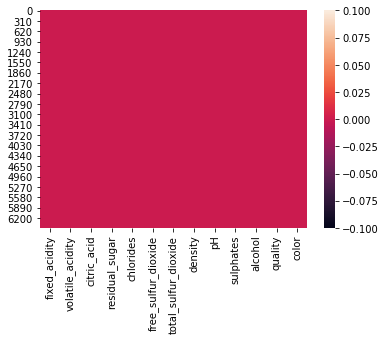

In [6]:
sns.heatmap(df.isnull())

In [7]:
# Checking for different datatypes in the data set 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         6497 non-null   float64
 1   volatile_acidity      6497 non-null   float64
 2   citric_acid           6497 non-null   float64
 3   residual_sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free_sulfur_dioxide   6497 non-null   float64
 6   total_sulfur_dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  color                 6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [8]:
# Converting data type from 
df.quality  = df.quality .astype(int)


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         6497 non-null   float64
 1   volatile_acidity      6497 non-null   float64
 2   citric_acid           6497 non-null   float64
 3   residual_sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free_sulfur_dioxide   6497 non-null   float64
 6   total_sulfur_dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int32  
 12  color                 6497 non-null   object 
dtypes: float64(11), int32(1), object(1)
memory usage: 634.6+ KB


In [10]:
df.select_dtypes(include=['object'])

,color
0,red
1,red
2,red
3,red
4,red
...,...
6492,white
6493,white
6494,white
6495,white


In [11]:
# describing the min,max,etc for all the columns in the data set 
df.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed_acidity,6497.0,7.215307,1.296434,3.80000,6.40000,7.00000,7.70000,15.90000
volatile_acidity,6497.0,0.339666,0.164636,0.08000,0.23000,0.29000,0.40000,1.58000
citric_acid,6497.0,0.318633,0.145318,0.00000,0.25000,0.31000,0.39000,1.66000
residual_sugar,6497.0,5.443235,4.757804,0.60000,1.80000,3.00000,8.10000,65.80000
chlorides,6497.0,0.056034,0.035034,0.00900,0.03800,0.04700,0.06500,0.61100
free_sulfur_dioxide,6497.0,30.525319,17.749400,1.00000,17.00000,29.00000,41.00000,289.00000
total_sulfur_dioxide,6497.0,115.744574,56.521855,6.00000,77.00000,118.00000,156.00000,440.00000
density,6497.0,0.994697,0.002999,0.98711,0.99234,0.99489,0.99699,1.03898
pH,6497.0,3.218501,0.160787,2.72000,3.11000,3.21000,3.32000,4.01000
sulphates,6497.0,0.531268,0.148806,0.22000,0.43000,0.51000,0.60000,2.00000


In [12]:
# vinding the count of color 
df["color"].value_counts()

white    4898
red      1599
Name: color, dtype: int64

In [13]:
# Label Encoding 
#### perfroming label encoding for the color column to put it as 1's or 0's
#### 1 is for white and 0 is for red

In [14]:
df['color']=LabelEncoder().fit_transform(df.color)
df.head(200)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,0
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,7.8,0.590,0.33,2.0,0.074,24.0,120.0,0.9968,3.25,0.54,9.4,5,0
196,7.3,0.580,0.30,2.4,0.074,15.0,55.0,0.9968,3.46,0.59,10.2,5,0
197,11.5,0.300,0.60,2.0,0.067,12.0,27.0,0.9981,3.11,0.97,10.1,6,0
198,5.4,0.835,0.08,1.2,0.046,13.0,93.0,0.9924,3.57,0.85,13.0,7,0


In [15]:
# finding the number of white wine and red wine 
df["color"].value_counts()

1    4898
0    1599
Name: color, dtype: int64

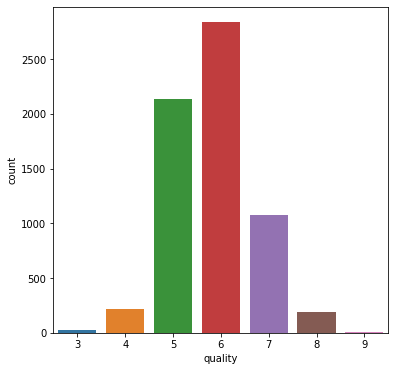

In [16]:
# count plot for the qualities of wine present 
plt.figure(figsize=(6,6))
sns.countplot(df["quality"])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E6AA0C8508>,
      dtype=object)

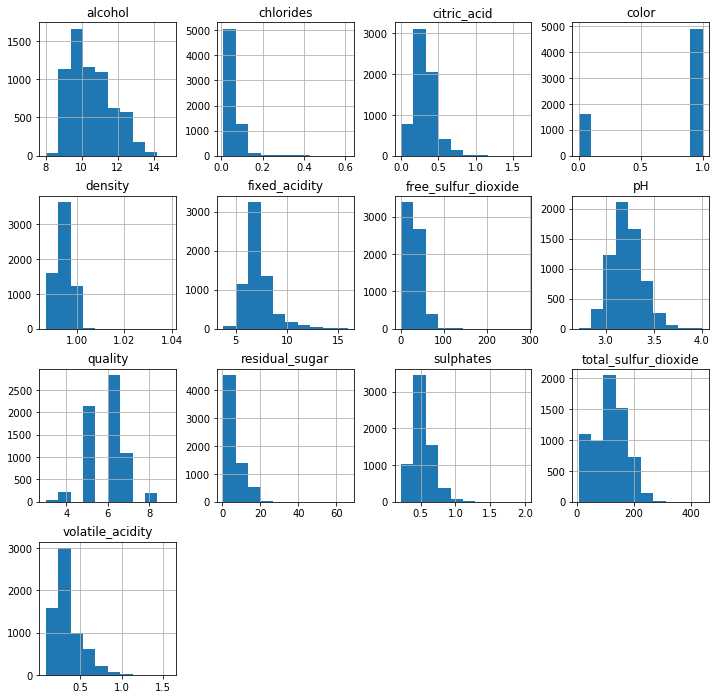

In [17]:
df.hist(figsize=(12,12))

#### Giving labels for the quality of the wine
#### If the quality of wine is less than 5 it is low quality
#### If the quality is from 5 to 6 its medium quality
#### If the quality is above 6 that the wine is of higher quality

In [18]:
quality = df["quality"].values
category = []
for num in quality:
    if num < 5:
        category.append("Low")
    elif num > 6:
        category.append("High")
    else:
        category.append("Medium")
category = pd.DataFrame(data=category, columns=["category"])
df = pd.concat([df, category], axis=1)

In [19]:
df.drop(columns="quality", axis=1, inplace=True)

In [20]:
df

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,color,category
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0,Medium
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,0,Medium
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,0,Medium
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,0,Medium
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,1,Medium
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,1,Medium
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,1,Medium
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,1,High


In [21]:
# counting the wine based on its quality
df["category"].value_counts()

Medium    4974
High      1277
Low        246
Name: category, dtype: int64

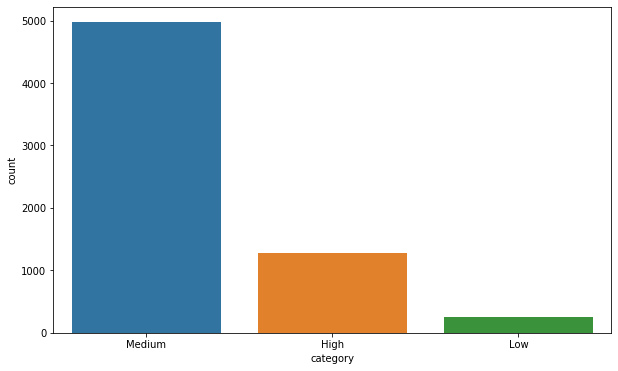

In [22]:
# graph to represent the count of the win e based on the quality
plt.figure(figsize=(10, 6))
sns.countplot(df["category"])

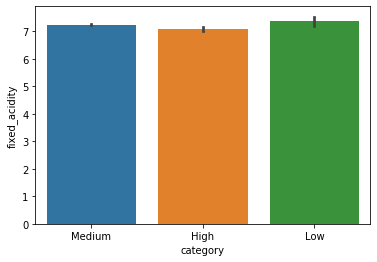

In [23]:
sns.barplot(x='category',y='fixed_acidity',data=df)

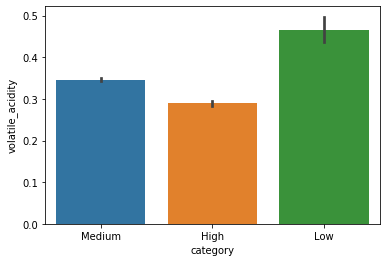

In [24]:
sns.barplot(x='category',y='volatile_acidity',data=df)

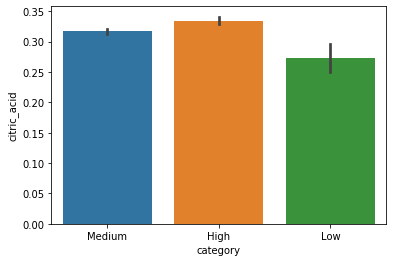

In [25]:
sns.barplot(x='category',y='citric_acid',data=df)

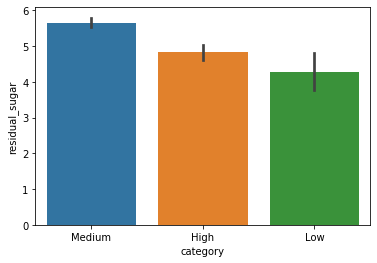

In [26]:
sns.barplot(x='category',y='residual_sugar',data=df)

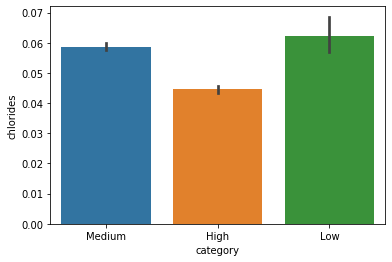

In [27]:
sns.barplot(x='category',y='chlorides',data=df)

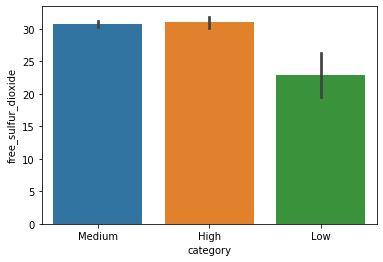

In [28]:
sns.barplot(x='category',y='free_sulfur_dioxide',data=df)

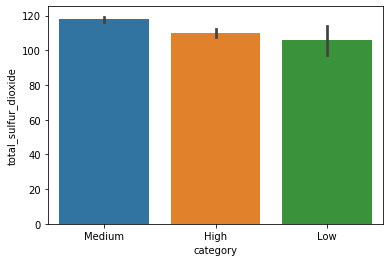

In [29]:
sns.barplot(x='category',y='total_sulfur_dioxide',data=df)

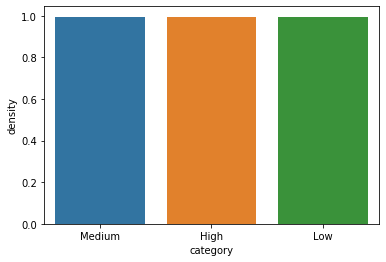

In [30]:
sns.barplot(x='category',y='density',data=df)

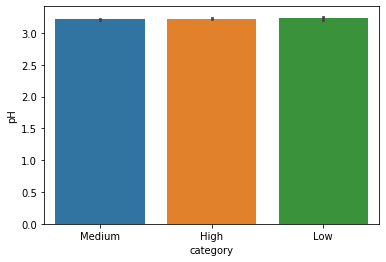

In [31]:
sns.barplot(x='category',y='pH',data=df)

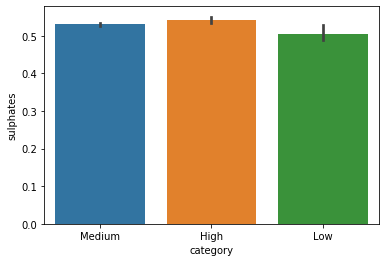

In [32]:
sns.barplot(x='category',y='sulphates',data=df)

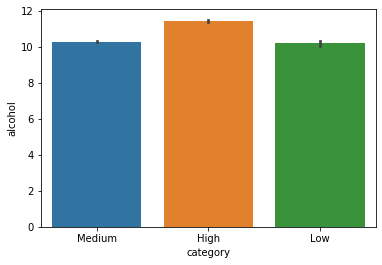

In [33]:
sns.barplot(x='category',y='alcohol',data=df)

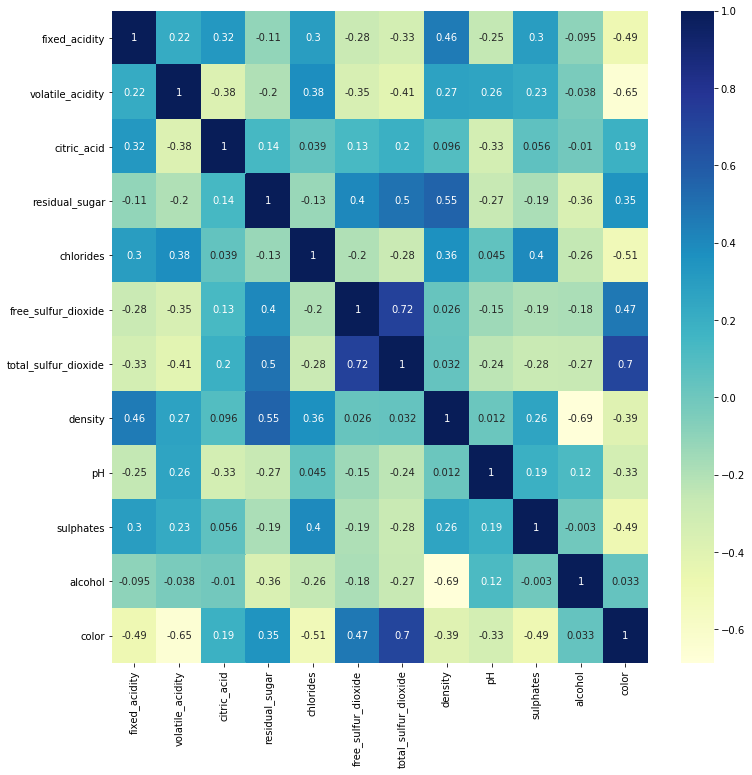

In [34]:
## visualizing the correlation
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(),annot=True,cmap="YlGnBu")

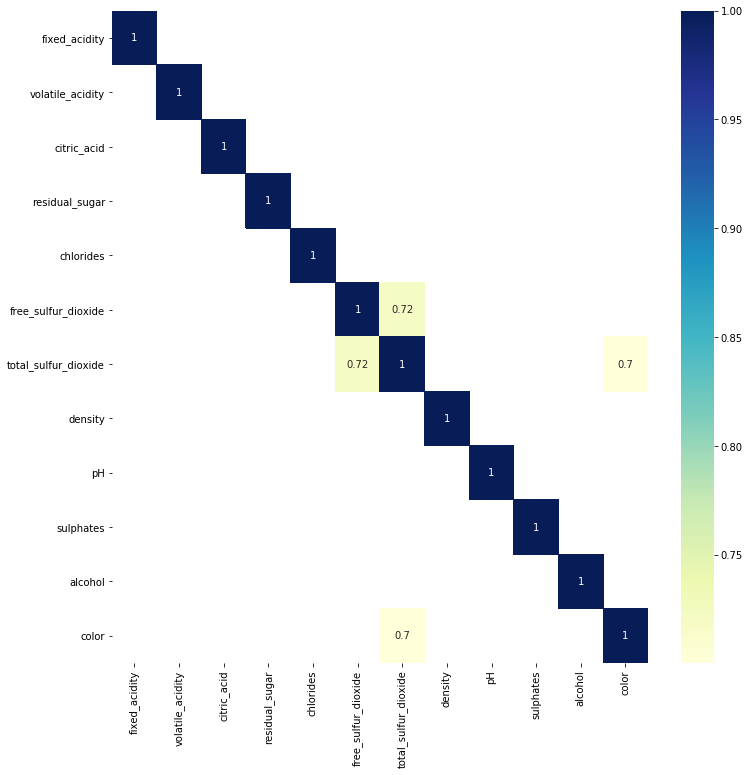

In [35]:
## visualizing the correlation
plt.figure(figsize=(12,12))
sns.heatmap(df.corr()[df.corr()>0.7],annot=True,cmap="YlGnBu")

### Splitting the data into input and output

In [36]:
# input 
X = df.drop(["category"],axis=1)
X

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0
...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,1
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,1
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,1
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,1


In [37]:
# Output
y= df.category
y

0       Medium
1       Medium
2       Medium
3       Medium
4       Medium
         ...  
6492    Medium
6493    Medium
6494    Medium
6495      High
6496    Medium
Name: category, Length: 6497, dtype: object

### Spliting the input and output to train test 

In [38]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=1)

In [39]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(4872, 12)
(1625, 12)
(4872,)
(1625,)


In [40]:
# printing the data set of X_train
X_train

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,color
275,7.9,0.545,0.06,4.00,0.087,27.0,61.0,0.99650,3.36,0.67,10.7,0
3406,8.8,0.200,0.43,15.00,0.053,60.0,184.0,1.00080,3.28,0.79,8.8,1
3163,9.1,0.280,0.49,2.00,0.059,10.0,112.0,0.99580,3.15,0.46,10.1,1
4623,7.0,0.130,0.37,12.85,0.042,36.0,105.0,0.99581,3.05,0.55,10.7,1
2527,6.5,0.250,0.35,12.00,0.055,47.0,179.0,0.99800,3.58,0.47,10.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
905,9.2,0.580,0.20,3.00,0.081,15.0,115.0,0.99800,3.23,0.59,9.5,0
5192,5.6,0.280,0.28,4.20,0.044,52.0,158.0,0.99200,3.35,0.44,10.7,1
3980,7.0,0.230,0.42,5.10,0.042,37.0,144.0,0.99518,3.50,0.59,10.2,1
235,7.2,0.630,0.00,1.90,0.097,14.0,38.0,0.99675,3.37,0.58,9.0,0


In [41]:
# printing the dataset of y_train
y_train

275     Medium
3406    Medium
3163    Medium
4623    Medium
2527    Medium
         ...  
905     Medium
5192      High
3980    Medium
235     Medium
5157    Medium
Name: category, Length: 4872, dtype: object

In [42]:
# printing the data set of X_test
X_test

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,color
3772,7.6,0.32,0.58,16.75,0.050,43.0,163.0,0.99990,3.15,0.54,9.200000,1
6009,5.7,0.24,0.47,6.30,0.069,35.0,182.0,0.99391,3.11,0.46,9.733333,1
3464,7.6,0.36,0.44,8.30,0.255,28.0,142.0,0.99580,3.12,0.43,10.200000,1
1518,7.4,0.47,0.46,2.20,0.114,7.0,20.0,0.99647,3.32,0.63,10.500000,0
3761,9.9,0.49,0.23,2.40,0.087,19.0,115.0,0.99480,2.77,0.44,9.400000,1
...,...,...,...,...,...,...,...,...,...,...,...,...
4276,6.2,0.25,0.31,3.20,0.030,32.0,150.0,0.99014,3.18,0.31,12.000000,1
5282,6.8,0.15,0.41,12.90,0.044,79.5,183.0,0.99742,3.24,0.78,10.200000,1
3854,7.3,0.21,0.21,1.60,0.046,35.0,133.0,0.99466,3.38,0.46,10.000000,1
3358,6.6,0.62,0.20,8.70,0.046,81.0,224.0,0.99605,3.17,0.44,9.300000,1


In [43]:
# printing the dataset of y_test
y_test

3772    Medium
6009    Medium
3464    Medium
1518    Medium
3761    Medium
         ...  
4276    Medium
5282    Medium
3854    Medium
3358    Medium
5866      High
Name: category, Length: 1625, dtype: object

### Decision Tree classifier

In [44]:
from sklearn import tree
DTC=tree.DecisionTreeClassifier(random_state=15)
DTC.fit(X_train, y_train)

DecisionTreeClassifier(random_state=15)

In [45]:
y_train_pred=DTC.predict(X_train)
y_train_pred

array(['Medium', 'Medium', 'Medium', ..., 'Medium', 'Medium', 'Medium'],
      dtype=object)

In [46]:
y_test_pred=DTC.predict(X_test)
y_test_pred

array(['Medium', 'Medium', 'Medium', ..., 'Medium', 'Medium', 'High'],
      dtype=object)

In [47]:
from sklearn.metrics import classification_report,f1_score
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

        High       1.00      1.00      1.00       970
         Low       1.00      1.00      1.00       180
      Medium       1.00      1.00      1.00      3722

    accuracy                           1.00      4872
   macro avg       1.00      1.00      1.00      4872
weighted avg       1.00      1.00      1.00      4872



In [48]:
f1_train_DTC=f1_score(y_train,y_train_pred,average=None)
print("f1_Score=",f1_train_DTC)

f1_Score= [1. 1. 1.]


In [49]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

        High       0.57      0.64      0.61       307
         Low       0.32      0.35      0.33        66
      Medium       0.88      0.85      0.86      1252

    accuracy                           0.79      1625
   macro avg       0.59      0.61      0.60      1625
weighted avg       0.80      0.79      0.79      1625



In [50]:
f1_test_DTC=f1_score(y_test,y_test_pred,average=None)
print("f1_Score=",f1_test_DTC)

f1_Score= [0.60736196 0.33093525 0.8645791 ]


### Random forest 

In [51]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(random_state=15)
rfc.fit(X_train,y_train)

RandomForestClassifier(random_state=15)

In [52]:
# predicting the y_pred_train from X_train
y_predict_train=rfc.predict(X_train)
y_predict_train

array(['Medium', 'Medium', 'Medium', ..., 'Medium', 'Medium', 'Medium'],
      dtype=object)

In [53]:
# predicting the y_predict_test from X_test
y_predict_test=rfc.predict(X_test)
y_predict_test

array(['Medium', 'Medium', 'Medium', ..., 'Medium', 'Medium', 'Medium'],
      dtype=object)

In [54]:
# checking the f1 score 
print(classification_report(y_train,y_predict_train))

              precision    recall  f1-score   support

        High       1.00      1.00      1.00       970
         Low       1.00      1.00      1.00       180
      Medium       1.00      1.00      1.00      3722

    accuracy                           1.00      4872
   macro avg       1.00      1.00      1.00      4872
weighted avg       1.00      1.00      1.00      4872



In [55]:
f1_train_RFC=f1_score(y_train,y_train_pred,average=None)
print("f1_Score=",f1_train_RFC)

f1_Score= [1. 1. 1.]


In [56]:
print(classification_report(y_test,y_predict_test))

              precision    recall  f1-score   support

        High       0.78      0.58      0.66       307
         Low       0.92      0.17      0.28        66
      Medium       0.87      0.96      0.91      1252

    accuracy                           0.86      1625
   macro avg       0.85      0.57      0.62      1625
weighted avg       0.85      0.86      0.84      1625



In [57]:
f1_test_RFC=f1_score(y_test,y_predict_test,average=None)
print("f1_Score=",f1_test_RFC)

f1_Score= [0.66292135 0.28205128 0.91129644]


### Hyper parameter tuning using Grid Search CV

In [58]:
grid_param={'n_estimators': 
            [10, 50, 150,200],
            'max_features': ['auto', 'sqrt'],
            'min_samples_split':[1, 2, 3, 4], 
            'min_samples_leaf':[1, 2, 5]}

In [59]:
from sklearn.model_selection import GridSearchCV
grid_search=GridSearchCV(estimator=rfc,param_grid=grid_param)
# applting to the data set 
grid_search.fit(X_train,y_train)

C:\Users\karthik\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\karthik\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\karthik\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "C:\Users\karthik\anaconda3\lib\site-packages\joblib\parallel.py", line 1004, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\karthik\anaconda3\lib\site-packages\joblib\parallel.py", line 835, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\karthik\anaconda3\lib\site-packages\joblib\parallel.py", line 754, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)
  File "C:\Users

GridSearchCV(estimator=RandomForestClassifier(random_state=15),
             param_grid={'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 5],
                         'min_samples_split': [1, 2, 3, 4],
                         'n_estimators': [10, 50, 150, 200]})

In [60]:
grid_search.best_params_

{'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 4,
 'n_estimators': 150}

In [61]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(random_state=15,max_features='sqrt',
 min_samples_leaf = 1,
 min_samples_split= 4,
 n_estimators=200)
rf.fit(X_train,y_train)

RandomForestClassifier(max_features='sqrt', min_samples_split=4,
                       n_estimators=200, random_state=15)

In [62]:
# predicting the y_pred_train from X_train
y_pred_train=rf.predict(X_train)
y_pred_train

array(['Medium', 'Medium', 'Medium', ..., 'Medium', 'Medium', 'Medium'],
      dtype=object)

In [63]:
# predicting the y_predict_test from X_test
y_predict_test=rf.predict(X_test)
y_predict_test

array(['Medium', 'Medium', 'Medium', ..., 'Medium', 'Medium', 'Medium'],
      dtype=object)

In [64]:
# checking the f1 score 
print(classification_report(y_train,y_pred_train))

              precision    recall  f1-score   support

        High       1.00      0.99      1.00       970
         Low       1.00      0.91      0.95       180
      Medium       0.99      1.00      1.00      3722

    accuracy                           1.00      4872
   macro avg       1.00      0.97      0.98      4872
weighted avg       1.00      1.00      1.00      4872



In [65]:
f1_train_RFC1=f1_score(y_train,y_pred_train,average=None)
print("f1_Score=",f1_train_RFC1)

f1_Score= [0.99637869 0.95348837 0.99691978]


In [66]:
print(classification_report(y_test,y_predict_test))

              precision    recall  f1-score   support

        High       0.79      0.57      0.67       307
         Low       1.00      0.14      0.24        66
      Medium       0.87      0.96      0.91      1252

    accuracy                           0.86      1625
   macro avg       0.89      0.56      0.61      1625
weighted avg       0.86      0.86      0.84      1625



In [67]:
f1_test_RFC1=f1_score(y_test,y_predict_test,average=None)
print("f1_Score=",f1_test_RFC1)

f1_Score= [0.66540643 0.24       0.91156463]


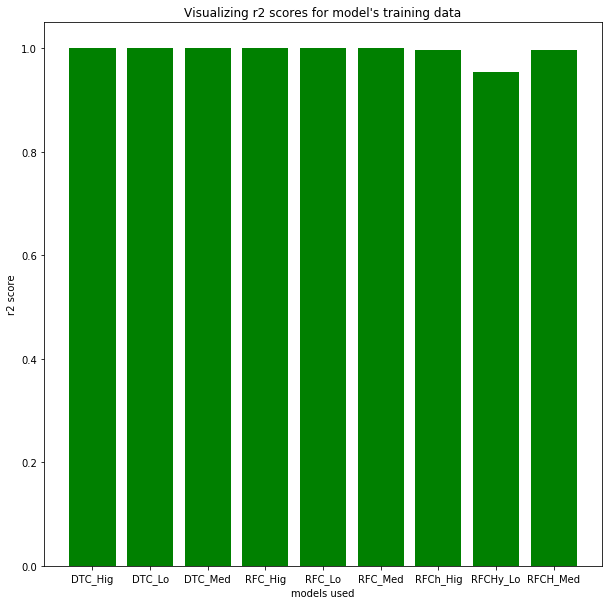

In [68]:
model_tr=["DTC_Hig","DTC_Lo","DTC_Med",
       "RFC_Hig","RFC_Lo","RFC_Med",
       "RFCh_Hig","RFCHy_Lo","RFCH_Med"]
f1_tr= [1,1,1,1,1,1,0.99637869,0.95348837,0.99691978]
plt.figure(figsize=(10,10))
plt.bar(model_tr,f1_tr,color='green')
plt.title("Visualizing r2 scores for model's training data")
plt.xlabel('models used')
plt.ylabel('r2 score')
plt.show()

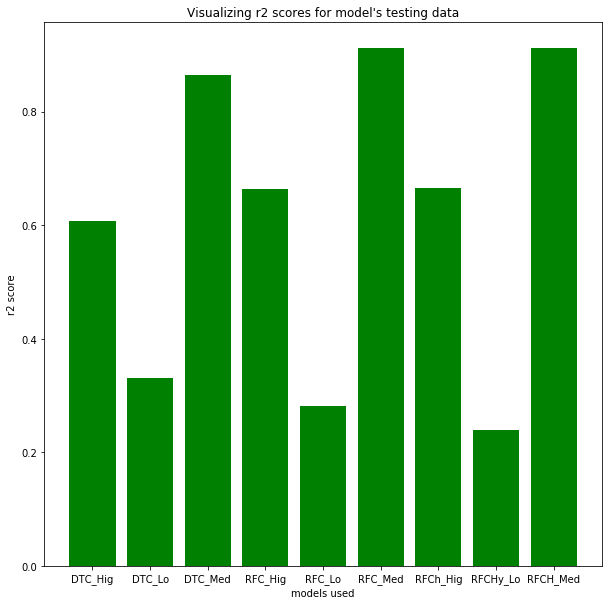

In [69]:
model_te=["DTC_Hig","DTC_Lo","DTC_Med",
       "RFC_Hig","RFC_Lo","RFC_Med",
       "RFCh_Hig","RFCHy_Lo","RFCH_Med"]
f1_te= [0.60736196,0.33093525,0.8645791,0.66292135,0.28205128,0.91129644,0.66540643,0.24,0.91156463]
plt.figure(figsize=(10,10))
plt.bar(model_te,f1_te,color='green')
plt.title("Visualizing r2 scores for model's testing data")
plt.xlabel('models used')
plt.ylabel('r2 score')
plt.show()

### Predicting the quality using Random Forest

In [70]:
print(rfc.predict([[5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,0]]))

['High']


In [71]:
print(rfc.predict([[6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,0]]))

['Medium']


In [72]:
print(rfc.predict([[5.7,1.13,0.09,1.5,0.172,7,19,0.994,3.5,0.48,9.8,1]]))

['Low']


### Predicting on raw (untrained data):

In [73]:
print(rfc.predict([[8.1,0.38,0.28,2.1,0.066,13,30,0.9968,3.23,0.73,9.7,0]]))

['High']


In [74]:
print(rfc.predict([[8.1,0.66,0.22,2.2,0.069,9,23,0.9968,3.3,1.2,10.3,0]]))

['Medium']


In [75]:
print(rfc.predict([[5.7,1.13,0.09,1.5,0.172,7,19,0.994,3.5,0.48,9.8,0]]))

['Low']
